# Introduction
<b>HOW TO USE THIS NOTEBOOK</b>

This is a Jupyter notebook.  It integrates my written code with tables, graphs, and explanations.  After finishing myriad novel algorithms, this is the culmination of all outputs.

You don't need to read or run any of the code; the outputs are already visible below each cell (notice the red "Out" on the left of the outputs below.

## Import Patient Data

In [76]:
# Import Python APIs for data handling
import numpy as np
import pandas as pd
import os

# Patient list we started with
pt_list = [283846, 575852, 867202, 1770690, 1796650, 1980730,
          2249087, 3406478, 3427895, 3451725, 3471107, 3711107,
          3712357, 4223514, 4259800, 4384579]

# Several patients must be excluded, mainly due to incomplete datasets
exclusions = [283846, 1796650, 1980730, 2249087, 3406478, 3471107, 
              3712357, 3740057, 3711107, 4384579]
pt_list = [pt for pt in pt_list if pt not in exclusions] # Remove exclusions

# Define a working directory
root = r'C:\Users\aborg\Desktop\..Imported Mandible\Pickle Files May 7 2020\Outputs'
patient_number = pt_list[0]

# Import and store saved data as variables
data_ = os.path.join(root, '%s_all_data.csv' % patient_number)
bins_ = os.path.join(root, '%s_dose_bins.csv' % patient_number)
coth = pd.read_pickle(data_)
dose = pd.read_pickle(bins_)

print('Data loaded for patient %s.' % patient_number) # Print statement

Data loaded for patient 575852.


# Viewing Data
The algorithm outputs myriad variables and types.  Let's take a look at the first five lines of the "data" variable.

In [9]:
coth.head(5)

,Pre CTh,Post CTh,Pct Change,Distances,Pre Err,Post Err,Dose,Pt
0,2.926698,3.085985,5.442568,2.258378,1.272265e-02,0.007880,0.000000,575852
1,3.274294,2.729330,-16.643698,2.243121,1.246493e-02,0.008114,72.053073,575852
2,3.368458,2.965358,-11.966896,2.308988,1.000000e+10,0.008973,72.053073,575852
3,3.543770,3.210767,-9.396879,2.311792,1.491459e-02,0.008884,72.303061,575852
4,3.396229,2.947921,-13.200181,2.023262,1.358274e-02,0.009560,0.000000,575852


### What does this tell us?
First, look at the left side.  0, 1, 2, 3, 4 represent five different sets of matched points.  Each set has a "trio" of points: a Pre-RT Point, a Post-RT Point, and Dose Point (points may or may not be repeated, due to sporadic sampling).  Each pre- and post-RT point has a cortical thickness measurement, along with an error outputted alongside it (both in mm).  The percent change should be self-explanatory (positive values indicate Co.Th. increasing, and vice versa).  "Distances" indicates the furthest distance any point in the trio is from the furthest (in mm, and serves as an additional indication of local error).  Dose is measured in Gray.  "Pt" is simply the patient's number.

### How can we make use of it?
This table has tens of thousands of point trios.  To start, let's just get a summary of the table.

In [10]:
coth.describe()

,Pre CTh,Post CTh,Pct Change,Distances,Pre Err,Post Err,Dose,Pt
count,14991.000000,29198.000000,14991.000000,29198.000000,1.499100e+04,2.919800e+04,44971.000000,44971.0
mean,2.147574,1.752159,-0.598717,0.772111,6.157042e+08,4.651013e+08,16.414952,575852.0
std,0.844037,0.773288,85.480582,0.639923,2.403814e+09,2.105905e+09,28.446280,0.0
min,0.061450,-0.467177,-162.791263,0.005431,5.186124e-03,5.174079e-03,0.000000,575852.0
25%,1.644921,1.223858,-35.500803,0.479409,6.372163e-03,6.134186e-03,0.000000,575852.0
50%,2.164530,1.682191,-14.237654,0.629947,7.623268e-03,7.139969e-03,0.000000,575852.0
75%,2.665561,2.145459,8.803036,0.823962,1.075627e-02,9.205383e-03,31.139983,575852.0
max,5.891550,5.415735,2232.510299,6.026678,1.000000e+10,1.000000e+10,74.241645,575852.0


## Filter and Sort Output
The table above provides a good snapshot at this patient's information.  It displays broad information regarding all vertices from the patient's point clouds, grouped by type.


We're able to filter out irrelevant information.  For example, if the Pre-RT and Post-RT "Error" associated with each vertex exceeds a threshold, the row may be removed.  Let's do some filtering, then see what the dataset is like.

In [66]:
# Remove datapoints with a local error below 0.1 mm
coth_ = coth[coth['Post Err'] < 0.1]
coth_ = coth_[coth_['Pre Err'] < 0.1]

# Remove datapoints with furthest associated neighbor distance of greater than 1 mm
coth_ = coth_[coth_['Distances'] < 1]

# Remove datapoints exhibiting unreasonable % change
all_coth_ = all_coth_[all_coth_['Pct Change'] < 100]
all_coth_ = all_coth_[all_coth_['Pct Change'] > -100]
dose = dose[dose < 100]
dose = dose[dose > -100]

# Remove datapoints exhibiting 0 Gy
coth_ = coth_[coth_['Dose'] != 0]

coth_.describe() # Display table

,Pre CTh,Post CTh,Pct Change,Distances,Pre Err,Post Err,Dose,Pt
count,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.000000,7543.0
mean,2.163754,1.720629,-12.444668,0.596233,0.008932,0.008610,51.410825,575852.0
std,0.747946,0.650876,60.914860,0.197261,0.006026,0.004461,27.263337,0.0
min,0.072421,-0.467177,-162.791263,0.020529,0.005189,0.005272,0.132069,575852.0
25%,1.715132,1.327590,-37.992636,0.462293,0.006336,0.006563,33.833248,575852.0
50%,2.177391,1.669865,-19.692089,0.594135,0.007359,0.007486,67.152370,575852.0
75%,2.626579,2.084835,-0.362650,0.733033,0.009336,0.008962,72.703984,575852.0
max,5.840707,5.159563,1807.578726,0.999839,0.098345,0.081240,74.241645,575852.0


### What's different?
As desired, distances are now all under 1 mm.  In other words, the only data left are those 1 mm or closer to each other.  Likewise, all errors are below our somewhat arbitrary threshold of 0.1 mm.

Now that some definitive sources of error have been filtered, let's see a few rows of what we have left.

In [58]:
# Remove unused columns
coth__ = coth_.drop(['Post Err', 'Pre Err', 'Distances', 'Pt'], axis=1)

# Display first five rows of remaining data
coth__.head(5)

,Pre CTh,Post CTh,Pct Change,Dose
285,3.766890,3.884945,3.134004,26.828874
331,3.277897,2.970216,-9.386532,71.138023
345,3.008629,3.079923,2.369649,68.840966
350,3.069374,3.121491,1.697968,67.751397
351,3.709679,2.953530,-20.383133,67.751397


## Co.Th. Histogram

(-100, 100)

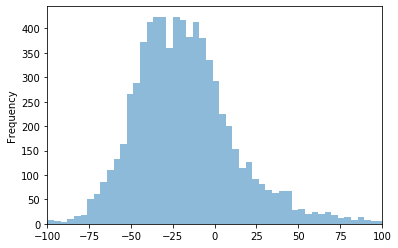

In [59]:
# Display histogram
ax = coth__['Pct Change'].plot.hist(bins = 500, alpha = 0.5)

# Set x-axis limit
ax.set_xlim(-100, 100)

# Binning Doses

The Python programming language is extremely powerful.  It is simple to splice and compare different aspects of "big" data.

In [60]:
dose.describe()

,>0 Gy,>10 Gy,>20 Gy,>30 Gy,>40 Gy
count,11867.000000,10052.000000,10052.000000,9628.000000,8510.000000
mean,-10.809380,-18.309428,-18.309428,-18.856378,-20.529646
std,60.195896,38.500133,38.500133,39.029869,39.399848
min,-162.791263,-162.791263,-162.791263,-162.791263,-162.791263
25%,-38.569360,-40.860864,-40.860864,-41.582029,-42.743660
50%,-18.834730,-22.570769,-22.570769,-23.506795,-25.765323
75%,0.929518,-3.945371,-3.945371,-4.766606,-6.895867
max,1807.578726,282.606278,282.606278,282.606278,282.606278


## What does this tell us?
Keep in mind: Values (mean, min, max, etc.) represent the cortical thickness change (%) about each vertex.

From the count, most points exhibit either a high dose (over 40 Gy) or a low dose (under 10 Gy).  The mean and median ('50%') follow a similar trend.  A binned histogram is more useful, see below.

Text(0.5, 1.0, 'CTh % Change with Bins')

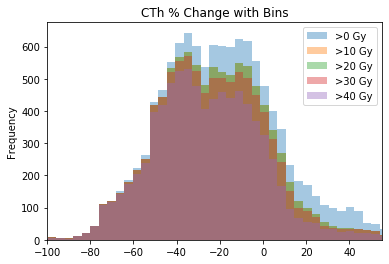

In [61]:
ax = dose.plot.hist(bins = 500, alpha = 0.4) # 'alpha' indicates color
ax.set_xlim(-100, 55) # Set axes limits
ax.set_title('CTh % Change with Bins') # Set title

Let's compare this to the original histogram, without bins.

Text(0.5, 1.0, 'CTh % Change without Bins')

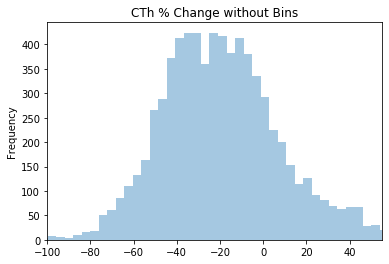

In [62]:
ax = coth__['Pct Change'].plot.hist(bins = 500, alpha = 0.4)
ax.set_xlim(-100, 55)
ax.set_title('CTh % Change without Bins')

# Combining all patients
All these data are from a singular patient.  Let's combine all data and view the results.

In [63]:
# Generate list of filenames
coth_files = [os.path.join(root, '%s_all_data.csv' % patient_number) for patient_number in pt_list]

# Concatenate all patients
all_coth = pd.concat([pd.read_pickle(fp) for fp in coth_files], ignore_index=True)

all_coth.describe() # Display table

,Pre CTh,Post CTh,Pct Change,Distances,Pre Err,Post Err,Dose,Pt
count,174399.000000,177826.000000,159984.000000,177826.000000,1.743990e+05,1.778260e+05,129954.000000,2.839760e+05
mean,2.051608,1.837416,3.456724,0.823021,7.410039e+08,6.256130e+08,18.545752,2.568945e+06
std,0.962218,0.785105,210.153303,0.932882,2.619346e+09,2.421726e+09,28.612003,1.456935e+06
min,-0.330000,-0.496271,-36400.405059,0.003384,5.158179e-03,5.158301e-03,0.000000,5.758520e+05
25%,1.406557,1.315338,-31.156987,0.409878,6.615563e-03,6.442726e-03,0.000000,8.672020e+05
50%,1.964181,1.773074,-7.199634,0.566702,8.324892e-03,7.772787e-03,0.000000,3.427895e+06
75%,2.572688,2.279323,19.788296,0.856965,1.280692e-02,1.096108e-02,51.054102,4.223514e+06
max,6.964240,6.924207,61670.588845,10.460968,1.000000e+10,1.000000e+10,74.241645,4.259800e+06


## Filter comprehensive data

In [74]:
# Remove datapoints with a local error below 0.1 mm
all_coth_ = all_coth[all_coth['Post Err'] < 0.1]
all_coth_ = all_coth_[all_coth_['Pre Err'] < 0.1]

# Remove datapoints with furthest associated neighbor distance of greater than 1 mm
all_coth_ = all_coth_[all_coth_['Distances'] < 1]

# Remove datapoints exhibiting unreasonable % change
all_coth_ = all_coth_[all_coth_['Pct Change'] < 100]
all_coth_ = all_coth_[all_coth_['Pct Change'] > -100]

 # Remove unused columns
all_coth_ = all_coth_.drop(['Post Err', 'Pre Err', 'Pt'], axis=1)

all_coth_.describe() # Display table

,Pre CTh,Post CTh,Pct Change,Distances,Dose
count,97343.000000,97343.000000,97343.000000,97343.000000,51022.000000
mean,2.176106,1.859502,-7.273735,0.519670,17.002725
std,0.907546,0.717372,33.844200,0.199498,27.512988
min,0.037485,0.001202,-99.657191,0.003384,0.000000
25%,1.565232,1.379103,-31.326839,0.376033,0.000000
50%,2.053447,1.796708,-9.035700,0.497474,0.000000
75%,2.646903,2.276084,14.807142,0.649788,40.276328
max,6.964240,6.457602,99.973205,0.999950,74.241645


### Box plot
Now let's display a box plot of all the filtered data.  It has almost <b>100,000</b> data points, each representing a vertex trio.

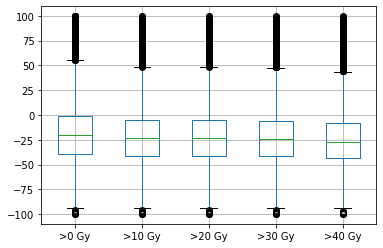

In [67]:
dose.boxplot()

### Future direction
* Incorporate dose fractionation
* Utilize databases